<a href="https://colab.research.google.com/github/rohailkhan/deep_learning/blob/master/3_MNIST_33_%26_IMDB_70_Reuters_78_data_l%3D361.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [95]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn.model_selection as model_selection

import tensorflow
from tensorflow import keras 

from tensorflow.keras import layers
from tensorflow.keras import models

from tensorflow.keras.callbacks import EarlyStopping , ModelCheckpoint


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [96]:
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
print([train_images.shape, train_labels.shape,test_images.shape, test_labels.shape])

11493376/11490434 [==============================] - 0s 0us/step
[(60000, 28, 28), (60000,), (10000, 28, 28), (10000,)]


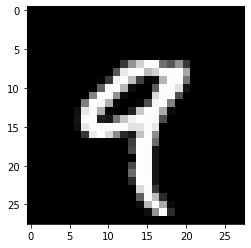

In [121]:
digit = train_images[4]
plt.imshow(digit,cmap='gray',vmin=0,vmax=255)
plt.show()


In [97]:
#reshape train data
train_images = train_images.reshape((60000, 28 * 28))
#train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28 * 28))
#test_images = test_images.astype('float32') / 255
print([train_images.shape, train_labels.shape,test_images.shape, test_labels.shape])

[(60000, 784), (60000,), (10000, 784), (10000,)]


# We have 10 classes,so the target should have 10 labels. We acheive it by one hot encoding

In [98]:
from tensorflow.keras.utils import to_categorical
NB_CLASSES = 10 # number of outputs = number of digits
#One-hot representation of the labels.
train_labels = to_categorical(train_labels, NB_CLASSES)
test_labels = to_categorical(test_labels, NB_CLASSES)
print([train_images.shape, train_labels.shape,test_images.shape, test_labels.shape])

[(60000, 784), (60000, 10), (10000, 784), (10000, 10)]


In [0]:
network = models.Sequential()
network.add(layers.Dense(512, kernel_initializer=keras.initializers.glorot_uniform(seed=66),activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(10,kernel_initializer=keras.initializers.glorot_uniform(seed=66), activation='softmax'))

In [0]:
network.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

In [101]:
historynew=network.fit(train_images,train_labels,epochs=5,batch_size=128)

Epoch 1/5
469/469 [==============================] - 4s 9ms/step - loss: 5.4011 - accuracy: 0.8983
Epoch 2/5
469/469 [==============================] - 4s 9ms/step - loss: 0.6588 - accuracy: 0.9532
Epoch 3/5
469/469 [==============================] - 5s 10ms/step - loss: 0.4593 - accuracy: 0.9650
Epoch 4/5
469/469 [==============================] - 4s 9ms/step - loss: 0.3543 - accuracy: 0.9712
Epoch 5/5
469/469 [==============================] - 4s 8ms/step - loss: 0.3323 - accuracy: 0.9753


In [102]:
for i in historynew.history.keys():
  print(i)

loss
accuracy


In [219]:
print("loss= " + str(historynew.history['loss']))
print("accuracy= " + str(historynew.history['accuracy']))

loss= [5.7169365882873535, 0.709601104259491, 0.4701370894908905, 0.391478031873703, 0.35608041286468506]
accuracy= [0.8992166519165039, 0.9532999992370605, 0.9653000235557556, 0.9725333452224731, 0.9761999845504761]


## Training with validation data

In [103]:
print([train_images.shape, train_labels.shape,test_images.shape, test_labels.shape])

[(60000, 784), (60000, 10), (10000, 784), (10000, 10)]


In [93]:
a=[1,2,3,4,5,6,7,8,9,10]
print(a[:5])
print(a[-5:])

[1, 2, 3, 4, 5]
[6, 7, 8, 9, 10]


In [0]:
# use 30% of data for validation
x_val = train_images[:2000]
partial_x_train = train_images[-2000:]
y_val = train_labels[:2000]
partial_y_train = train_labels[-2000:]

In [105]:
print(x_val.shape,y_val.shape,partial_x_train.shape,partial_y_train.shape)

(2000, 784) (2000, 10) (2000, 784) (2000, 10)


In [0]:
from tensorflow.keras.callbacks import EarlyStopping
early=EarlyStopping(monitor='val_loss',patience=2)

In [0]:
# changing optimizer and also the learning rate
from tensorflow.keras.optimizers import Adam
opt=Adam(learning_rate=0.0001)


In [0]:
network.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['accuracy'])

In [109]:
history2_mnist=network.fit(partial_x_train,
partial_y_train,epochs=1000,batch_size=128,validation_data=(x_val,y_val),callbacks=[early])

Epoch 1/1000
16/16 [==============================] - 0s 17ms/step - loss: 0.0967 - accuracy: 0.9925 - val_loss: 0.1135 - val_accuracy: 0.9870
Epoch 2/1000
16/16 [==============================] - 0s 11ms/step - loss: 0.0496 - accuracy: 0.9965 - val_loss: 0.1121 - val_accuracy: 0.9875
Epoch 3/1000
16/16 [==============================] - 0s 11ms/step - loss: 0.0341 - accuracy: 0.9980 - val_loss: 0.1103 - val_accuracy: 0.9870
Epoch 4/1000
16/16 [==============================] - 0s 11ms/step - loss: 0.0220 - accuracy: 0.9985 - val_loss: 0.1100 - val_accuracy: 0.9865
Epoch 5/1000
16/16 [==============================] - 0s 11ms/step - loss: 0.0179 - accuracy: 0.9990 - val_loss: 0.1103 - val_accuracy: 0.9870
Epoch 6/1000
16/16 [==============================] - 0s 12ms/step - loss: 0.0062 - accuracy: 0.9990 - val_loss: 0.1105 - val_accuracy: 0.9865


In [110]:
evalautation=network.evaluate(x_val,y_val)

63/63 [==============================] - 0s 2ms/step - loss: 0.1115 - accuracy: 0.9865


In [111]:
history2_mnist_dict=history2_mnist.history
for i in history2_mnist_dict.keys():
  print(i)

loss
accuracy
val_loss
val_accuracy


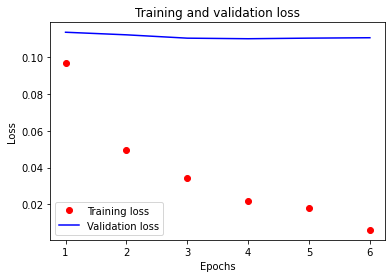

In [112]:
loss_values=history2_mnist_dict['loss']
val_loss_values=history2_mnist_dict['val_loss']
epochs = range(1, len(history2_mnist_dict['loss']) + 1)
plt.plot(epochs, loss_values, 'bo',color='red', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


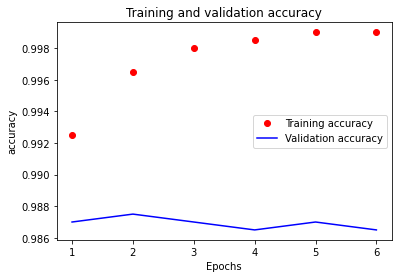

In [113]:
accuracy_values=history2_mnist_dict['accuracy']
val_accuracy_values=history2_mnist_dict['val_accuracy']
epochs = range(1, len(history2_mnist_dict['accuracy']) + 1)
plt.plot(epochs, accuracy_values, 'bo',color='red', label='Training accuracy')
plt.plot(epochs, val_accuracy_values, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

https://www.manning.com/books/deep-learning-with-python  What is loss funcion...page 60

# IMDB example

In [2]:
from keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

Using TensorFlow backend.


17465344/17464789 [==============================] - 0s 0us/step


In [3]:
print(train_data.shape,train_labels.shape,test_data.shape,test_labels.shape)

(25000,) (25000,) (25000,) (25000,)


In [5]:
max([max(k) for k in train_data])

9999

In [51]:
max([max(p) for p in test_data])

9999

In [6]:
import numpy as np
np.zeros([1,2])

array([[0., 0.]])

In [0]:
def one_hot(sequence,dimension=10000):
  #array of allll zeros
  result=np.zeros(shape=(len(sequence),dimension))
  for i,sequence in enumerate(sequence):
    result[i,sequence]=1
  return result

In [0]:
x_train=one_hot(train_data)
x_test=one_hot(test_data)

In [19]:
print(train_labels.shape)
print(train_labels[0:1])
print(train_labels[0:2])
print(train_labels[0:5])

(25000,)
[1]
[1 0]
[1 0 0 1 0]


convert labels to float

In [9]:
# vectroise labels
y_train=np.asanyarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')
print(y_train.shape)
print(y_train[0:1])
print(y_train[0:2])
print(y_train[0:5])

(25000,)
[1.]
[1. 0.]
[1. 0. 0. 1. 0.]


In [67]:
type(train_data)

numpy.ndarray

In [0]:
from tensorflow.keras.utils import to_categorical

In [0]:
y_train=to_categorical(y_train)
y_test=to_categorical(y_test)

In [78]:
train_labels[1:4]

array([0, 0, 1])

In [0]:
from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [0]:
from keras import optimizers
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])

In [0]:
# using losses  with hyperparameters
model.compile(optimizer=optimizers.RMSprop(learning_rate=0.01),loss='binary_crossentropy',metrics=['accuracy'])

In [0]:
#using metrics with hyperparameters
from keras import metrics
model.compile(optimizer=optimizers.RMSprop(learning_rate=0.01),loss='binary_crossentropy',metrics=[metrics.binary_accuracy])

In [0]:
# validating our aproach by splitting data in train and test
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]


In [0]:
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['acc'])

In [0]:
history = model.fit(partial_x_train,partial_y_train,epochs=20,batch_size=512,validation_data=(x_val, y_val))

In [30]:
history_dict=history.history
for i in history_dict.keys():
  print(i)

val_loss
val_acc
loss
acc


In [31]:
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

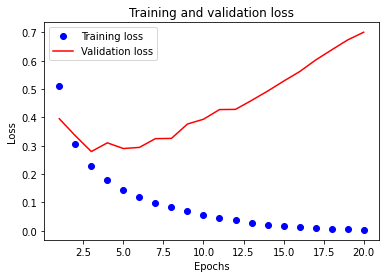

In [35]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(history_dict['acc']) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss',color='red')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

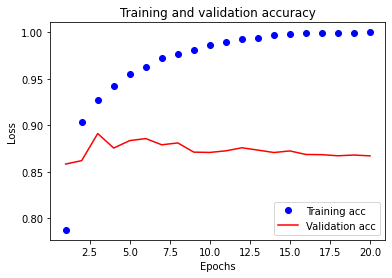

In [39]:
plt.clf()
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']
plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc',color='red')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Reuters Dataset

In [13]:
from keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(
num_words=10000)

2113536/2110848 [==============================] - 0s 0us/step


In [14]:
print(train_data.shape,train_labels.shape,test_data.shape,test_labels.shape)

(8982,) (8982,) (2246,) (2246,)


In [98]:
t=np.array([1,2,3])
r=np.zeros((len(t),4))
r

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [99]:
for i, s in enumerate(t):
    r[i,s] = 1
r
# you can see that the for loop modified only a set of elements (len(t)) 
# which has index [i,s] (in this case ; (0, 1), (1, 2), (2, 3), an so on))

array([[0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]])

In [0]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1.
  return results

In [0]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [0]:
def to_one_hot(labels, dimension=46):
  results = np.zeros((len(labels), dimension))
  for i, label in enumerate(labels):
    results[i, label] = 1.
  return results

In [0]:
one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

In [0]:
#Note that there is a built-in way to do this in Keras, which you’ve 
# already seen in action in the MNIST example:
from keras.utils.np_utils import to_categorical
one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [56]:
print(one_hot_test_labels.shape,one_hot_train_labels.shape)

(2246, 46) (8982, 46)


In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow import keras
import tensorflow

In [0]:
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow import keras
import tensorflow

In [0]:
model = models.Sequential()

In [0]:
from tensorflow.keras import initializers

In [0]:
model.add(layers.Dense(64, activation='relu',kernel_initializer=initializers.glorot_uniform(seed=66), input_shape=(10000,)))

In [0]:
model.add(layers.Dense(64, activation='relu',kernel_initializer=initializers.glorot_uniform(seed=66), input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu',kernel_initializer=initializers.glorot_uniform(seed=66)))
model.add(layers.Dense(46, activation='softmax',kernel_initializer=initializers.glorot_uniform(seed=66)))

In [0]:
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

In [119]:
from keras.datasets import reuters
(x_train, y_train), (x_test, y_test) = reuters.load_data(
num_words=10000)

print(x_train.shape , y_train.shape , x_test.shape ,y_test.shape)

(8982,) (8982,) (2246,) (2246,)


In [0]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1.
  return results

In [121]:
x_train=vectorize_sequences(x_train)
x_test=vectorize_sequences(x_test)
print(x_train.shape , y_train.shape , x_test.shape ,y_test.shape)

(8982, 10000) (8982,) (2246, 10000) (2246,)


In [68]:
#Note that there is a built-in way to do this in Keras, which you’ve 
# already seen in action in the MNIST example:
# from keras.utils.np_utils import to_categorical

def to_one_hot(labels, dimension=46):
  results = np.zeros((len(labels), dimension))
  for i, label in enumerate(labels):
    results[i, label] = 1.
  return results
y_train=to_one_hot(y_train)
y_test=to_one_hot(y_test)
print(x_train.shape , y_train.shape , x_test.shape ,y_test.shape)

(8982, 10000) (8982, 46) (2246, 10000) (2246, 46)


In [122]:
from keras.utils import to_categorical
num_classes=46
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes) 
print(x_train.shape , y_train.shape , x_test.shape ,y_test.shape)

(8982, 10000) (8982, 46) (2246, 10000) (2246, 46)


Taking only 1000 samples in X nad y

In [123]:
x_val=x_train[:1000]
x_train_partial=x_train[-1000:]
print(x_val.shape , x_train_partial.shape)

(1000, 10000) (1000, 10000)


In [0]:
y_val=y_train[:1000]
y_train_partial=y_train[-1000:]

In [125]:
print(x_val.shape , x_train_partial.shape, y_val.shape ,y_val_partial.shape)

(1000, 10000) (1000, 10000) (1000, 46) (1000, 46)


In [0]:
history=model.fit(x_train_partial,y_val_partial,validation_data=(x_val,y_val),epochs=20,batch_size=512)

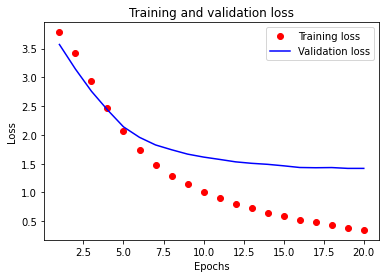

In [85]:
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss',color='red')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [89]:
for i in history.history.keys():
  print(i)

loss
accuracy
val_loss
val_accuracy


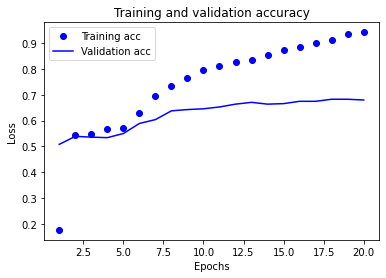

In [90]:
plt.clf()
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [114]:
model.evaluate(x_test,y_test)

71/71 [==============================] - 0s 2ms/step - loss: 1.5212 - accuracy: 0.6670


[1.521156907081604, 0.666963517665863]

In [0]:
from tensorflow.keras.callbacks import EarlyStopping
early=EarlyStopping(monitor='val_loss',patience=2)

In [0]:
history=model.fit(x_train_partial,y_val_partial,validation_data=(x_val,y_val),epochs=20,batch_size=512,callbacks=[early])

In [127]:
model.evaluate(x_test,y_test)

71/71 [==============================] - 0s 2ms/step - loss: 1.5596 - accuracy: 0.6719


[1.5595948696136475, 0.6718611121177673]

In [0]:
history=model.fit(x_train_partial,y_val_partial,validation_data=(x_val,y_val),epochs=8,batch_size=512)

In [131]:
model.evaluate(x_test,y_test)

71/71 [==============================] - 0s 3ms/step - loss: 2.1461 - accuracy: 0.6857


[2.146097421646118, 0.6856634020805359]

In [0]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,),kernel_initializer=keras.initializers.glorot_uniform(seed=66)))
model.add(layers.Dense(64, activation='relu',kernel_initializer=keras.initializers.glorot_uniform(seed=66)))
model.add(layers.Dense(46, activation='softmax',kernel_initializer=keras.initializers.glorot_uniform(seed=66)))
model.compile(optimizer='rmsprop',
loss='categorical_crossentropy',
metrics=['accuracy'])
model.fit(x_train_partial,y_val_partial,validation_data=(x_val,y_val),epochs=200,batch_size=128,callbacks=early)


In [156]:
results = model.evaluate(x_test, y_test)

71/71 [==============================] - 0s 2ms/step - loss: 1.4677 - accuracy: 0.7119


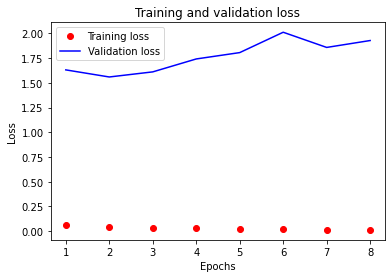

In [157]:
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss',color='red')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()